In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score



import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

In [180]:
urls = [
    'https://raw.githubusercontent.com/BILGI-IE-423/ie423-2024-termproject-ai-world/main/Datasets/netflix_titles.csv',
    'https://raw.githubusercontent.com/BILGI-IE-423/ie423-2024-termproject-ai-world/main/Datasets/amazon_prime_titles.csv',
    'https://raw.githubusercontent.com/BILGI-IE-423/ie423-2024-termproject-ai-world/main/Datasets/Bechdel.csv',
    'https://raw.githubusercontent.com/BILGI-IE-423/ie423-2024-termproject-ai-world/main/Datasets/MovieGenre.csv'
]

dfs = []
for i, url in enumerate(urls):
    df_name = f'df_{i+1}'
    globals()[df_name] = pd.read_csv(url, encoding='ISO-8859-9')
    dfs.append(globals()[df_name])

In [181]:
netflix_df = df_1
prime_df = df_2
bechdel_df = df_3
movieposter_df = df=df_4

In [182]:
movieposter_df.head(3)

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...


In [183]:
def split_title_and_year(title):
    parts = title.rsplit('(', 1)
    film_name = parts[0].strip()
    if len(parts) > 1:
        year = parts[1][:-1]  
    else:
        year = ''  
    return pd.Series([film_name, year], index=['title', 'year'])


movieposter_df[['title', 'year']] = movieposter_df['Title'].apply(split_title_and_year)


movieposter_df.drop('Title', axis=1, inplace=True)


movieposter_df = movieposter_df[['imdbId', 'Imdb Link', 'title', 'year', 'IMDB Score', 'Genre', 'Poster']]

In [184]:
print(movieposter_df.columns)

Index(['imdbId', 'Imdb Link', 'title', 'year', 'IMDB Score', 'Genre',
       'Poster'],
      dtype='object')


In [185]:
num_duplicates = netflix_df.duplicated().sum()
print(num_duplicates)

0


In [186]:
num_duplicates = prime_df.duplicated().sum()
print(num_duplicates)

0


In [187]:
num_duplicates = bechdel_df.duplicated().sum()
print(num_duplicates)

0


In [188]:
num_duplicates = movieposter_df.duplicated().sum()
print(num_duplicates)
movieposter_df.drop_duplicates(subset=['title'], inplace=True)
num_duplicates = movieposter_df.duplicated().sum()
print(num_duplicates)

593
0


/var/folders/t4/yh3xn1dx0gv2_gz1rfdn9cxm0000gn/T/ipykernel_7343/1597380130.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movieposter_df.drop_duplicates(subset=['title'], inplace=True)


In [189]:
merged_df = pd.concat([netflix_df, prime_df]).drop_duplicates(subset=['title'])
merged_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


In [190]:
merged_bnp_df = pd.merge(merged_df, bechdel_df, on='title', how='inner', suffixes=('_merged', '_bechdel'))
allmerged_df = pd.merge(merged_bnp_df, movieposter_df, on='title', how='inner')

In [191]:
duplicates = allmerged_df[allmerged_df.duplicated()]

if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found:")
    print(duplicates)

No duplicates found.


In [192]:
print(allmerged_df.columns)
unwanted_columns = ['show_id', 'date_added','imdbid','id', 'imdbId', 'listed_in', 'description',
       'Unnamed: 0', 'year_x','Imdb Link', 'year_y']
no_unw_col_df = allmerged_df.drop(unwanted_columns, axis=1)
new_column_order = ['type', 'title', 'cast', 'country',
       'release_year', 'rating_merged', 'duration', 'rating_bechdel', 'IMDB Score', 'Genre', 'Poster', 'director']
no_unw_col_df = no_unw_col_df.reindex(columns=new_column_order)

print(no_unw_col_df.head(5))
no_unw_col_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating_merged', 'duration', 'listed_in', 'description',
       'Unnamed: 0', 'imdbid', 'id', 'rating_bechdel', 'year_x', 'imdbId',
       'Imdb Link', 'year_y', 'IMDB Score', 'Genre', 'Poster'],
      dtype='object')
      type              title  \
0  TV Show  Dear White People   
1    Movie          Grown Ups   
2    Movie         Dark Skies   
3    Movie               Jaws   
4    Movie             Jaws 2   

                                                cast        country  \
0  Logan Browning, Brandon P. Bell, DeRon Horton,...  United States   
1  Adam Sandler, Kevin James, Chris Rock, David S...  United States   
2  Keri Russell, Josh Hamilton, J.K. Simmons, Dak...  United States   
3  Roy Scheider, Robert Shaw, Richard Dreyfuss, L...  United States   
4  Roy Scheider, Lorraine Gary, Murray Hamilton, ...  United States   

   release_year rating_merged   duration  rating_bech

Index(['type', 'title', 'cast', 'country', 'release_year', 'rating_merged',
       'duration', 'rating_bechdel', 'IMDB Score', 'Genre', 'Poster',
       'director'],
      dtype='object')

In [193]:
print(no_unw_col_df.isnull().sum())

type                0
title               0
cast               17
country           317
release_year        0
rating_merged       3
duration            0
rating_bechdel      0
IMDB Score          0
Genre               0
Poster              0
director           92
dtype: int64


In [194]:
no_unw_col_df.columns

Index(['type', 'title', 'cast', 'country', 'release_year', 'rating_merged',
       'duration', 'rating_bechdel', 'IMDB Score', 'Genre', 'Poster',
       'director'],
      dtype='object')

In [195]:
split_cast = no_unw_col_df['cast'].str.split(', ', expand=True)

for i in range(3):
    no_unw_col_df[f'cast{i+1}'] = split_cast[i]

no_unw_col_df.drop(columns=['cast'], inplace=True)

for i in range(3):
    no_unw_col_df.loc[:, f'cast{i+1}'] = no_unw_col_df[f'cast{i+1}'].fillna('')

In [196]:
no_unw_col_df.columns

Index(['type', 'title', 'country', 'release_year', 'rating_merged', 'duration',
       'rating_bechdel', 'IMDB Score', 'Genre', 'Poster', 'director', 'cast1',
       'cast2', 'cast3'],
      dtype='object')

In [197]:
cleaned_df=no_unw_col_df.dropna()
print(cleaned_df.isnull().sum())
cleaned_df.reset_index(drop=True, inplace=True)

type              0
title             0
country           0
release_year      0
rating_merged     0
duration          0
rating_bechdel    0
IMDB Score        0
Genre             0
Poster            0
director          0
cast1             0
cast2             0
cast3             0
dtype: int64


In [198]:
cleaned_df.loc[:, 'Genre'] = cleaned_df['Genre'].apply(lambda x: x.split('|')[0] if '|' in x else x)
cleaned_df.loc[:, 'country'] = cleaned_df['country'].apply(lambda x: x.split(',')[0] if x else '')

In [199]:
cleaned_df.head()

,type,title,country,release_year,rating_merged,duration,rating_bechdel,IMDB Score,Genre,Poster,director,cast1,cast2,cast3
0,Movie,Grown Ups,United States,2010,PG-13,103 min,3,6.0,Comedy,https://images-na.ssl-images-amazon.com/images...,Dennis Dugan,Adam Sandler,Kevin James,Chris Rock
1,Movie,Dark Skies,United States,2013,PG-13,97 min,2,6.3,Horror,https://images-na.ssl-images-amazon.com/images...,Scott Stewart,Keri Russell,Josh Hamilton,J.K. Simmons
2,Movie,Jaws,United States,1975,PG,124 min,3,8.0,Adventure,https://images-na.ssl-images-amazon.com/images...,Steven Spielberg,Roy Scheider,Robert Shaw,Richard Dreyfuss
3,Movie,Jaws 2,United States,1978,PG,116 min,2,5.7,Adventure,https://images-na.ssl-images-amazon.com/images...,Jeannot Szwarc,Roy Scheider,Lorraine Gary,Murray Hamilton
4,Movie,Jaws: The Revenge,United States,1987,PG-13,91 min,3,2.9,Adventure,https://images-na.ssl-images-amazon.com/images...,Joseph Sargent,Lorraine Gary,Lance Guest,Mario Van Peebles


In [200]:
cleaned_df['duration'] = cleaned_df['duration'].astype(str)
cleaned_df['duration'] = cleaned_df['duration'].str.extract('(\\d+)').astype(int)
cleaned_df['duration']

/var/folders/t4/yh3xn1dx0gv2_gz1rfdn9cxm0000gn/T/ipykernel_7343/1401832081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['duration'] = cleaned_df['duration'].astype(str)
/var/folders/t4/yh3xn1dx0gv2_gz1rfdn9cxm0000gn/T/ipykernel_7343/1401832081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['duration'] = cleaned_df['duration'].str.extract('(\\d+)').astype(int)


0      103
1       97
2      124
3      116
4       91
      ... 
666    132
667    102
668    124
669     89
670    103
Name: duration, Length: 671, dtype: int64

In [201]:
duplicates = cleaned_df.duplicated()
print(duplicates)
num_duplicates = duplicates.sum()
print("Number of duplicates:", num_duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
666    False
667    False
668    False
669    False
670    False
Length: 671, dtype: bool
Number of duplicates: 18


In [202]:
cleaned_df = cleaned_df.drop_duplicates()

In [203]:
null_values = cleaned_df.isnull().sum()
print(null_values)
num_null = null_values.sum()
print("Number of null values :", num_null)

type              0
title             0
country           0
release_year      0
rating_merged     0
duration          0
rating_bechdel    0
IMDB Score        0
Genre             0
Poster            0
director          0
cast1             0
cast2             0
cast3             0
dtype: int64
Number of null values : 0


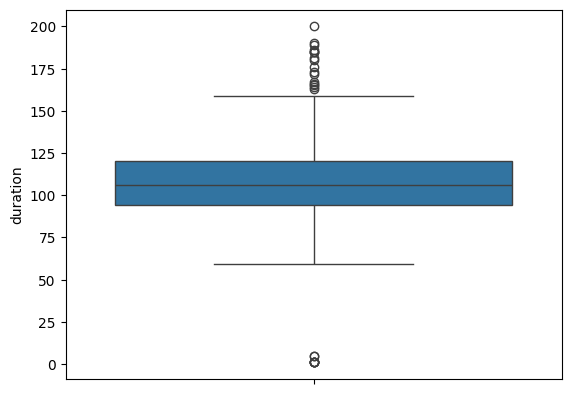

In [204]:
box=sns.boxplot(cleaned_df['duration'])
plt.show()

In [205]:
outliers = [f.get_ydata()[0] for f in box.lines if f.get_linestyle() == 'None']

outlier_indices = []
for val in outliers:
    indices = cleaned_df[cleaned_df['duration'] == val].index.tolist()
    outlier_indices.extend(indices)


print("Outlier values:", outliers)
print("Indices of outliers in the original data:", outlier_indices)

Outlier values: [1.0]
Indices of outliers in the original data: [136, 169, 221, 229, 246, 247]


In [206]:
cleaned_df = cleaned_df.drop([136, 169, 221, 229, 246, 247])

In [207]:
no_outlier_df=cleaned_df.reset_index(drop=True)
no_outlier_df

,type,title,country,release_year,rating_merged,duration,rating_bechdel,IMDB Score,Genre,Poster,director,cast1,cast2,cast3
0,Movie,Grown Ups,United States,2010,PG-13,103,3,6.0,Comedy,https://images-na.ssl-images-amazon.com/images...,Dennis Dugan,Adam Sandler,Kevin James,Chris Rock
1,Movie,Dark Skies,United States,2013,PG-13,97,2,6.3,Horror,https://images-na.ssl-images-amazon.com/images...,Scott Stewart,Keri Russell,Josh Hamilton,J.K. Simmons
2,Movie,Jaws,United States,1975,PG,124,3,8.0,Adventure,https://images-na.ssl-images-amazon.com/images...,Steven Spielberg,Roy Scheider,Robert Shaw,Richard Dreyfuss
3,Movie,Jaws 2,United States,1978,PG,116,2,5.7,Adventure,https://images-na.ssl-images-amazon.com/images...,Jeannot Szwarc,Roy Scheider,Lorraine Gary,Murray Hamilton
4,Movie,Jaws: The Revenge,United States,1987,PG-13,91,3,2.9,Adventure,https://images-na.ssl-images-amazon.com/images...,Joseph Sargent,Lorraine Gary,Lance Guest,Mario Van Peebles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,Movie,Die Hard,United States,1988,R,132,3,8.2,Action,https://images-na.ssl-images-amazon.com/images...,John McTiernan,Bruce Willis,Alan Rickman,Bonnie Bedelia
643,Movie,Top Five,United States,2014,R,102,3,6.4,Comedy,https://images-na.ssl-images-amazon.com/images...,Chris Rock,Chris Rock,Rosario Dawson,Gabrielle Union
644,Movie,Prometheus,United States,2012,R,124,3,7.0,Adventure,https://images-na.ssl-images-amazon.com/images...,Ridley Scott,Noomi Rapace,Michael Fassbender,Guy Pearce
645,Movie,Bride Wars,United States,2009,PG,89,3,5.5,Comedy,https://images-na.ssl-images-amazon.com/images...,Gary Winick,Kate Hudson,Anne Hathaway,Kristen Johnston


In [208]:
import requests
from PIL import Image
from io import BytesIO
import pandas as pd


no_outlier_df['Red'] = None
no_outlier_df['Green'] = None
no_outlier_df['Blue'] = None


failed_urls_count = 0


for index, url in enumerate(no_outlier_df['Poster']):
    
    image_url = url

    
    try:
        response = requests.get(image_url)
        if response.status_code == 200:
            
            image = Image.open(BytesIO(response.content))

            
            image_rgb = image.convert("RGB")

            
            width, height = image_rgb.size

            
            pixels = list(image_rgb.getdata())

            
            total_red = 0
            total_green = 0
            total_blue = 0

            
            for pixel in pixels:
                total_red += pixel[0]
                total_green += pixel[1]
                total_blue += pixel[2]

            
            total_pixels = len(pixels)
            total_average = total_red + total_green + total_blue

            normalized_red = (total_red / total_average) * 100
            normalized_green = (total_green / total_average) * 100
            normalized_blue = (total_blue / total_average) * 100

            
            no_outlier_df.at[index, 'Red'] = normalized_red
            no_outlier_df.at[index, 'Green'] = normalized_green
            no_outlier_df.at[index, 'Blue'] = normalized_blue
            
            
            #print(f"Normalized average red: {normalized_red:.2f}")
            #print(f"Normalized average green: {normalized_green:.2f}")
            #print(f"Normalized average blue: {normalized_blue:.2f}")
        else:
            #print(f"Can not reach url: {image_url}")
            failed_urls_count += 1  
    except Exception as e:
        print("error occured:", e)
        failed_urls_count += 1  

print(f"Unreachable url number: {failed_urls_count}")


print(no_outlier_df)


Unreachable url number: 59
      type                 title        country  release_year rating_merged  \
0    Movie             Grown Ups  United States          2010         PG-13   
1    Movie            Dark Skies  United States          2013         PG-13   
2    Movie                  Jaws  United States          1975            PG   
3    Movie                Jaws 2  United States          1978            PG   
4    Movie     Jaws: The Revenge  United States          1987         PG-13   
..     ...                   ...            ...           ...           ...   
642  Movie              Die Hard  United States          1988             R   
643  Movie              Top Five  United States          2014             R   
644  Movie            Prometheus  United States          2012             R   
645  Movie            Bride Wars  United States          2009            PG   
646  Movie  Little Miss Sunshine  United States          2006             R   

     duration  rating_be

In [209]:
no_outlier_df.isnull().sum()

type               0
title              0
country            0
release_year       0
rating_merged      0
duration           0
rating_bechdel     0
IMDB Score         0
Genre              0
Poster             0
director           0
cast1              0
cast2              0
cast3              0
Red               59
Green             59
Blue              59
dtype: int64

In [210]:
no_outlier_null_df = no_outlier_df.dropna()

In [211]:
no_outlier_null_df.isnull().sum()

type              0
title             0
country           0
release_year      0
rating_merged     0
duration          0
rating_bechdel    0
IMDB Score        0
Genre             0
Poster            0
director          0
cast1             0
cast2             0
cast3             0
Red               0
Green             0
Blue              0
dtype: int64

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━

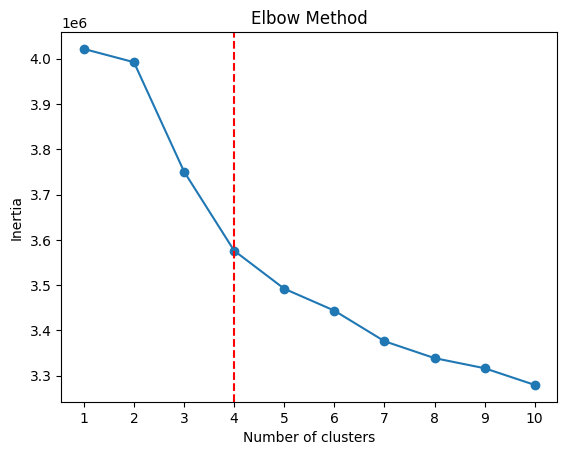

In [212]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


image_urls = no_outlier_null_df["Poster"]
model = VGG16(weights='imagenet', include_top=False, pooling='avg')
url_to_image = {}

def load_image_from_url(url):
    if url in url_to_image:
        return url_to_image[url]
    
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()  
        img = Image.open(BytesIO(response.content))
        img = img.resize((224, 224))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        
        url_to_image[url] = img_array
        
        return img_array
    except (requests.exceptions.RequestException, IOError) as e:
        return None

valid_images = []
valid_urls = []

for url in image_urls:
    img = load_image_from_url(url)
    if img is not None:
        valid_images.append(img)
        valid_urls.append(url)


features = [model.predict(img_array).flatten() for img_array in valid_images]


inertia_values = []


for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia_values.append(kmeans.inertia_)


plt.plot(range(1, 11), inertia_values, marker='o')
plt.axvline(x=4, color='r', linestyle='--', label='k = 4')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

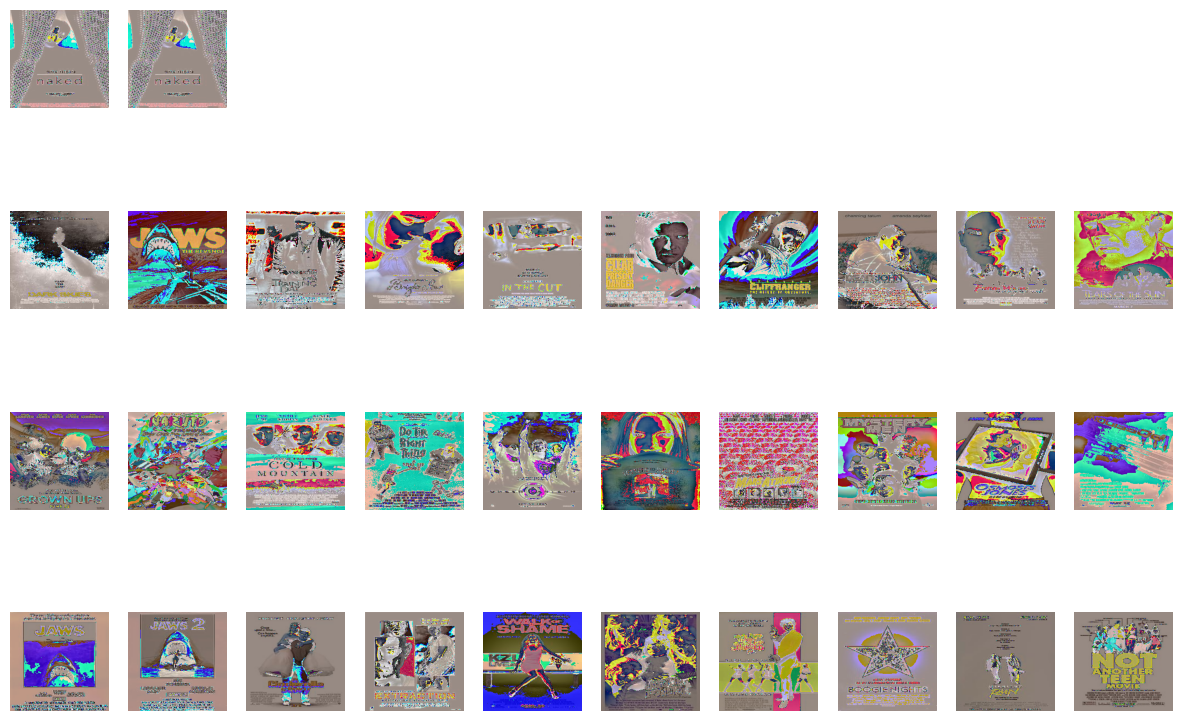

Cluster 1 (Number of images: 2):
Cluster 2 (Number of images: 291):
Cluster 3 (Number of images: 177):
Cluster 4 (Number of images: 118):


In [213]:

n_clusters = 4  
kmeans = KMeans(n_clusters=n_clusters, random_state=42, max_iter=500)
kmeans.fit(features)


labels = kmeans.labels_


plt.figure(figsize=(15, 10))

for i in range(n_clusters):
    cluster = np.where(labels == i)[0]
    num_images = len(cluster)
    
    for j, index in enumerate(cluster):
        if j >= 10: 
            break
        img = load_image_from_url(valid_urls[index])
        plt.subplot(n_clusters, 10, i * 10 + j + 1)  
        plt.imshow(np.uint8(img[0]))
        plt.axis('off')

plt.show()


for i in range(n_clusters):
    cluster = np.where(labels == i)[0]
    print(f"Cluster {i+1} (Number of images: {len(cluster)}):")
    

In [214]:
cluster_number = 1  
cluster_indices = np.where(labels == cluster_number - 1)[0]  

print(f"URLs of images in Cluster {cluster_number}:")
for index in cluster_indices:
    print(valid_urls[index])

URLs of images in Cluster 1:
https://images-na.ssl-images-amazon.com/images/M/MV5BMjA3Y2I4NjAtMDQyZS00ZGJhLWEwMzgtODBiNzE5Zjc1Nzk1L2ltYWdlXkEyXkFqcGdeQXVyNTc2MDU0NDE@._V1_UX182_CR0,0,182,268_AL_.jpg
https://images-na.ssl-images-amazon.com/images/M/MV5BMjA3Y2I4NjAtMDQyZS00ZGJhLWEwMzgtODBiNzE5Zjc1Nzk1L2ltYWdlXkEyXkFqcGdeQXVyNTc2MDU0NDE@._V1_UX182_CR0,0,182,268_AL_.jpg


In [215]:
indices=no_outlier_null_df.index[no_outlier_null_df['Poster']== 'https://images-na.ssl-images-amazon.com/images/M/MV5BMjA3Y2I4NjAtMDQyZS00ZGJhLWEwMzgtODBiNzE5Zjc1Nzk1L2ltYWdlXkEyXkFqcGdeQXVyNTc2MDU0NDE@._V1_UX182_CR0,0,182,268_AL_.jpg'].tolist()
print(indices)

[238, 239]


In [216]:
indices_to_drop = [238,239]
no_outlier_null_df=no_outlier_null_df.drop(indices_to_drop)

In [217]:
indices=no_outlier_null_df.index[no_outlier_null_df['Poster']== 'https://images-na.ssl-images-amazon.com/images/M/MV5BMjA3Y2I4NjAtMDQyZS00ZGJhLWEwMzgtODBiNzE5Zjc1Nzk1L2ltYWdlXkEyXkFqcGdeQXVyNTc2MDU0NDE@._V1_UX182_CR0,0,182,268_AL_.jpg'].tolist()
print(indices)

[]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━

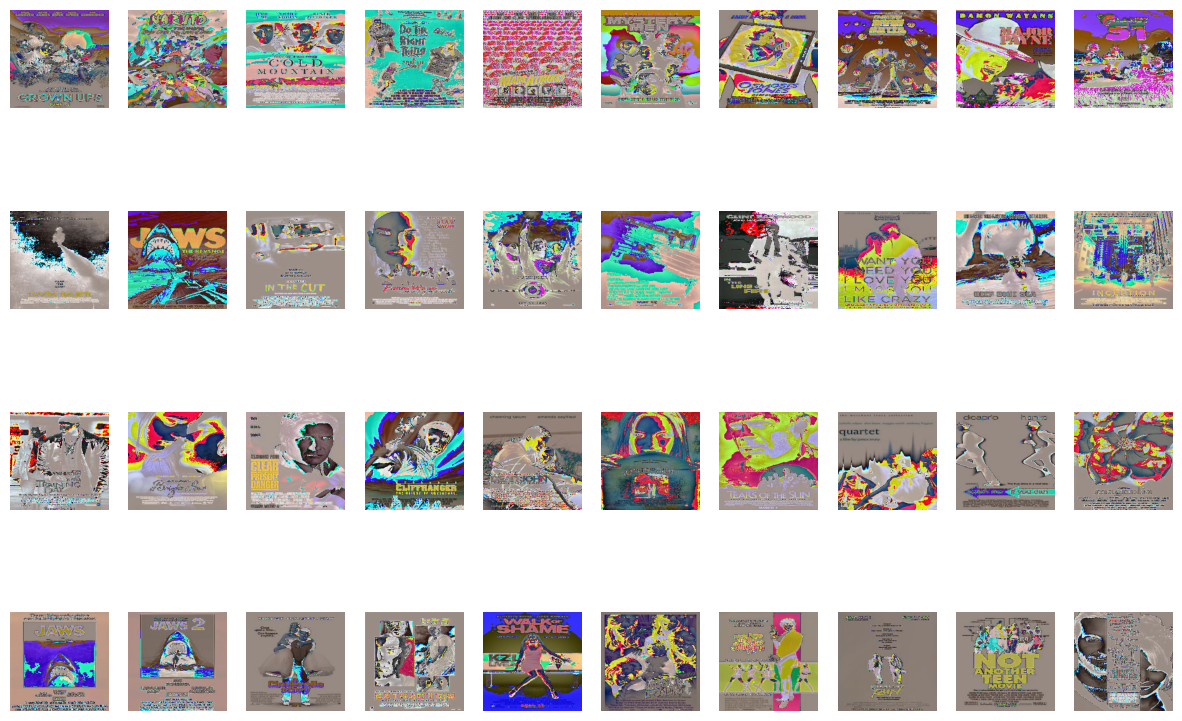

Cluster 1 (Number of images: 139):
Cluster 2 (Number of images: 177):
Cluster 3 (Number of images: 151):
Cluster 4 (Number of images: 119):


In [218]:
image_urls = no_outlier_null_df["Poster"]
model = VGG16(weights='imagenet', include_top=False, pooling='avg')
url_to_image = {}

def load_image_from_url(url):
    if url in url_to_image:
        return url_to_image[url]
    
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()  
        img = Image.open(BytesIO(response.content))
        img = img.resize((224, 224))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        
        url_to_image[url] = img_array
        
        return img_array
    except (requests.exceptions.RequestException, IOError) as e:
        return None

valid_images = []
valid_urls = []
invalid_urls = []

for url in image_urls:
    img = load_image_from_url(url)
    if img is not None:
        valid_images.append(img)
        valid_urls.append(url)
    else:
        invalid_urls.append(url)


features = [model.predict(img_array).flatten() for img_array in valid_images]


valid_urls_set = set(valid_urls)
image_urls_set = set(image_urls)

for invalid_url in invalid_urls:
    if invalid_url in valid_urls_set:
        invalid_index = valid_urls.index(invalid_url)
        del features[invalid_index]
        valid_urls.remove(invalid_url)


n_clusters = 4  
kmeans = KMeans(n_clusters=n_clusters, random_state=42,max_iter=500)
kmeans.fit(features)


labels = kmeans.labels_


no_outlier_null_df['Cluster'] = 9


for i, url in enumerate(valid_urls):
    index = no_outlier_null_df[no_outlier_null_df["Poster"] == url].index[0]
    no_outlier_null_df.at[index, 'Cluster'] = labels[i] + 1  


print(no_outlier_null_df)


plt.figure(figsize=(15, 10))

for i in range(n_clusters):
    cluster = np.where(labels == i)[0]
    num_images = len(cluster)
    
    for j, index in enumerate(cluster):
        if j >= 10:  
            break
        img = load_image_from_url(valid_urls[index])
        plt.subplot(n_clusters, 10, i * 10 + j + 1)  
        plt.imshow(np.uint8(img[0]))
        plt.axis('off')

plt.show()

for i in range(n_clusters):
    cluster = np.where(labels == i)[0]
    print(f"Cluster {i+1} (Number of images: {len(cluster)}):")

In [219]:
no_outlier_null_df

,type,title,country,release_year,rating_merged,duration,rating_bechdel,IMDB Score,Genre,Poster,director,cast1,cast2,cast3,Red,Green,Blue,Cluster
0,Movie,Grown Ups,United States,2010,PG-13,103,3,6.0,Comedy,https://images-na.ssl-images-amazon.com/images...,Dennis Dugan,Adam Sandler,Kevin James,Chris Rock,30.387512,33.864236,35.748252,1
1,Movie,Dark Skies,United States,2013,PG-13,97,2,6.3,Horror,https://images-na.ssl-images-amazon.com/images...,Scott Stewart,Keri Russell,Josh Hamilton,J.K. Simmons,34.951252,32.810361,32.238387,2
2,Movie,Jaws,United States,1975,PG,124,3,8.0,Adventure,https://images-na.ssl-images-amazon.com/images...,Steven Spielberg,Roy Scheider,Robert Shaw,Richard Dreyfuss,26.887415,32.891786,40.220799,4
3,Movie,Jaws 2,United States,1978,PG,116,2,5.7,Adventure,https://images-na.ssl-images-amazon.com/images...,Jeannot Szwarc,Roy Scheider,Lorraine Gary,Murray Hamilton,31.946345,32.453986,35.599668,4
4,Movie,Jaws: The Revenge,United States,1987,PG-13,91,3,2.9,Adventure,https://images-na.ssl-images-amazon.com/images...,Joseph Sargent,Lorraine Gary,Lance Guest,Mario Van Peebles,32.252648,29.110029,38.637323,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,Movie,Die Hard,United States,1988,R,132,3,8.2,Action,https://images-na.ssl-images-amazon.com/images...,John McTiernan,Bruce Willis,Alan Rickman,Bonnie Bedelia,45.478347,30.35486,24.166793,3
643,Movie,Top Five,United States,2014,R,102,3,6.4,Comedy,https://images-na.ssl-images-amazon.com/images...,Chris Rock,Chris Rock,Rosario Dawson,Gabrielle Union,39.540535,26.952548,33.506917,1
644,Movie,Prometheus,United States,2012,R,124,3,7.0,Adventure,https://images-na.ssl-images-amazon.com/images...,Ridley Scott,Noomi Rapace,Michael Fassbender,Guy Pearce,21.567252,36.649885,41.782863,2
645,Movie,Bride Wars,United States,2009,PG,89,3,5.5,Comedy,https://images-na.ssl-images-amazon.com/images...,Gary Winick,Kate Hudson,Anne Hathaway,Kristen Johnston,35.364517,32.909631,31.725852,3


In [220]:
null_count_in_Cluster = no_outlier_null_df['Cluster'].isnull().sum()
print(f"' Total number of null values in Cluster : ' {null_count_in_Cluster} ")

' Total number of null values in Cluster : ' 0 


In [221]:
no_outlier_null_df = no_outlier_null_df.drop(no_outlier_null_df[no_outlier_null_df['Cluster'] == 9].index)
print(no_outlier_null_df)

      type                 title        country  release_year rating_merged  \
0    Movie             Grown Ups  United States          2010         PG-13   
1    Movie            Dark Skies  United States          2013         PG-13   
2    Movie                  Jaws  United States          1975            PG   
3    Movie                Jaws 2  United States          1978            PG   
4    Movie     Jaws: The Revenge  United States          1987         PG-13   
..     ...                   ...            ...           ...           ...   
642  Movie              Die Hard  United States          1988             R   
643  Movie              Top Five  United States          2014             R   
644  Movie            Prometheus  United States          2012             R   
645  Movie            Bride Wars  United States          2009            PG   
646  Movie  Little Miss Sunshine  United States          2006             R   

     duration  rating_bechdel  IMDB Score      Genr

In [222]:
null_count_in_Cluster = no_outlier_null_df['Cluster'].isnull().sum()
print(f"' Total number of null values in Cluster : ' {null_count_in_Cluster} ")

' Total number of null values in Cluster : ' 0 


In [223]:
df1_df= no_outlier_null_df.drop(columns=['Poster'])

In [224]:
df1_df.columns
df1_df.shape

(576, 17)

In [225]:
df1_df

,type,title,country,release_year,rating_merged,duration,rating_bechdel,IMDB Score,Genre,director,cast1,cast2,cast3,Red,Green,Blue,Cluster
0,Movie,Grown Ups,United States,2010,PG-13,103,3,6.0,Comedy,Dennis Dugan,Adam Sandler,Kevin James,Chris Rock,30.387512,33.864236,35.748252,1
1,Movie,Dark Skies,United States,2013,PG-13,97,2,6.3,Horror,Scott Stewart,Keri Russell,Josh Hamilton,J.K. Simmons,34.951252,32.810361,32.238387,2
2,Movie,Jaws,United States,1975,PG,124,3,8.0,Adventure,Steven Spielberg,Roy Scheider,Robert Shaw,Richard Dreyfuss,26.887415,32.891786,40.220799,4
3,Movie,Jaws 2,United States,1978,PG,116,2,5.7,Adventure,Jeannot Szwarc,Roy Scheider,Lorraine Gary,Murray Hamilton,31.946345,32.453986,35.599668,4
4,Movie,Jaws: The Revenge,United States,1987,PG-13,91,3,2.9,Adventure,Joseph Sargent,Lorraine Gary,Lance Guest,Mario Van Peebles,32.252648,29.110029,38.637323,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,Movie,Die Hard,United States,1988,R,132,3,8.2,Action,John McTiernan,Bruce Willis,Alan Rickman,Bonnie Bedelia,45.478347,30.35486,24.166793,3
643,Movie,Top Five,United States,2014,R,102,3,6.4,Comedy,Chris Rock,Chris Rock,Rosario Dawson,Gabrielle Union,39.540535,26.952548,33.506917,1
644,Movie,Prometheus,United States,2012,R,124,3,7.0,Adventure,Ridley Scott,Noomi Rapace,Michael Fassbender,Guy Pearce,21.567252,36.649885,41.782863,2
645,Movie,Bride Wars,United States,2009,PG,89,3,5.5,Comedy,Gary Winick,Kate Hudson,Anne Hathaway,Kristen Johnston,35.364517,32.909631,31.725852,3


In [226]:
from sklearn.preprocessing import OneHotEncoder


ohe_cast = OneHotEncoder(handle_unknown='ignore', sparse_output=False)


selected_columns = ['cast1', 'cast2', 'cast3']
selected_df = df1_df[selected_columns]


ohetransform_cast = ohe_cast.fit_transform(selected_df)


ohetransform_column_names_cast = ohe_cast.get_feature_names_out(selected_columns)
ohetransform_df_cast = pd.DataFrame(ohetransform_cast, columns=ohetransform_column_names_cast)


df1_df = pd.concat([df1_df, ohetransform_df_cast], axis=1)

df1_df.drop(columns=selected_columns, inplace=True)


print(df1_df)

      type              title        country  release_year rating_merged  \
0    Movie          Grown Ups  United States        2010.0         PG-13   
1    Movie         Dark Skies  United States        2013.0         PG-13   
2    Movie               Jaws  United States        1975.0            PG   
3    Movie             Jaws 2  United States        1978.0            PG   
4    Movie  Jaws: The Revenge  United States        1987.0         PG-13   
..     ...                ...            ...           ...           ...   
548    NaN                NaN            NaN           NaN           NaN   
551    NaN                NaN            NaN           NaN           NaN   
558    NaN                NaN            NaN           NaN           NaN   
560    NaN                NaN            NaN           NaN           NaN   
569    NaN                NaN            NaN           NaN           NaN   

     duration  rating_bechdel  IMDB Score      Genre          director  ...  \
0       

In [227]:
from sklearn.preprocessing import OneHotEncoder

ohe_type = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe_rating_merged = OneHotEncoder(handle_unknown = 'ignore', sparse_output=False)
ohe_Genre = OneHotEncoder(handle_unknown = 'ignore', sparse_output=False)

ohetransform_type = ohe_type.fit_transform(df1_df[['type']])
ohetransform_rating_merged = ohe_rating_merged.fit_transform(df1_df[['rating_merged']])
ohetransform_Genre = ohe_Genre.fit_transform(df1_df[['Genre']])

ohetransform_column_names_type = ohe_type.get_feature_names_out(['type'])
ohetransform_column_names_rating_merged = ohe_rating_merged.get_feature_names_out(['rating_merged'])
ohetransform_column_names_Genre = ohe_Genre.get_feature_names_out(['Genre'])

ohetransform_df_type = pd.DataFrame(ohetransform_type, columns=ohetransform_column_names_type)
ohetransform_df_rating_merged = pd.DataFrame(ohetransform_rating_merged, columns=ohetransform_column_names_rating_merged)
ohetransform_df_Genre = pd.DataFrame(ohetransform_Genre, columns=ohetransform_column_names_Genre)

In [228]:
encoded_df = pd.concat([df1_df,ohetransform_df_type, ohetransform_df_rating_merged, ohetransform_df_Genre], axis=1).drop(columns=['type',  'rating_merged', 'Genre'])
encoded_df

,title,country,release_year,duration,rating_bechdel,IMDB Score,director,Red,Green,Blue,...,Genre_Drama,Genre_Family,Genre_Fantasy,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Short,Genre_Thriller,Genre_Western,Genre_nan
0,Grown Ups,United States,2010.0,103.0,3.0,6.0,Dennis Dugan,30.387512,33.864236,35.748252,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Dark Skies,United States,2013.0,97.0,2.0,6.3,Scott Stewart,34.951252,32.810361,32.238387,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Jaws,United States,1975.0,124.0,3.0,8.0,Steven Spielberg,26.887415,32.891786,40.220799,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Jaws 2,United States,1978.0,116.0,2.0,5.7,Jeannot Szwarc,31.946345,32.453986,35.599668,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Jaws: The Revenge,United States,1987.0,91.0,3.0,2.9,Joseph Sargent,32.252648,29.110029,38.637323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [229]:
encoded_dropped_df=encoded_df.dropna()
last_df=encoded_dropped_df.reset_index(drop=True)
last_df

,title,country,release_year,duration,rating_bechdel,IMDB Score,director,Red,Green,Blue,...,Genre_Drama,Genre_Family,Genre_Fantasy,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Short,Genre_Thriller,Genre_Western,Genre_nan
0,Grown Ups,United States,2010.0,103.0,3.0,6.0,Dennis Dugan,30.387512,33.864236,35.748252,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Dark Skies,United States,2013.0,97.0,2.0,6.3,Scott Stewart,34.951252,32.810361,32.238387,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Jaws,United States,1975.0,124.0,3.0,8.0,Steven Spielberg,26.887415,32.891786,40.220799,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Jaws 2,United States,1978.0,116.0,2.0,5.7,Jeannot Szwarc,31.946345,32.453986,35.599668,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Jaws: The Revenge,United States,1987.0,91.0,3.0,2.9,Joseph Sargent,32.252648,29.110029,38.637323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,Striptease,United States,1996.0,117.0,3.0,4.3,Andrew Bergman,39.560717,32.889435,27.549848,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504,Superbad,United States,2007.0,113.0,3.0,7.6,Greg Mottola,36.978328,32.601013,30.420658,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
505,Superman Returns,United States,2006.0,154.0,1.0,6.1,Bryan Singer,29.71648,32.339889,37.943631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
506,Sweeney Todd: The Demon Barber of Fleet Street,United States,2007.0,116.0,1.0,7.4,Tim Burton,43.297282,28.540281,28.162437,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [230]:
last_df.describe

<bound method NDFrame.describe of                                               title        country  \
0                                         Grown Ups  United States   
1                                        Dark Skies  United States   
2                                              Jaws  United States   
3                                            Jaws 2  United States   
4                                 Jaws: The Revenge  United States   
..                                              ...            ...   
503                                      Striptease  United States   
504                                        Superbad  United States   
505                                Superman Returns  United States   
506  Sweeney Todd: The Demon Barber of Fleet Street  United States   
507                                  Swiss Army Man  United States   

     release_year  duration  rating_bechdel  IMDB Score  \
0          2010.0     103.0             3.0         6.0   
1      

In [231]:
last_df.columns

Index(['title', 'country', 'release_year', 'duration', 'rating_bechdel',
       'IMDB Score', 'director', 'Red', 'Green', 'Blue',
       ...
       'Genre_Drama', 'Genre_Family', 'Genre_Fantasy', 'Genre_Horror',
       'Genre_Musical', 'Genre_Mystery', 'Genre_Short', 'Genre_Thriller',
       'Genre_Western', 'Genre_nan'],
      dtype='object', length=1490)

In [232]:
last_df['director']

0                    Dennis Dugan
1                   Scott Stewart
2                Steven Spielberg
3                  Jeannot Szwarc
4                  Joseph Sargent
                  ...            
503                Andrew Bergman
504                  Greg Mottola
505                  Bryan Singer
506                    Tim Burton
507    Dan Kwan, Daniel Scheinert
Name: director, Length: 508, dtype: object

In [233]:
last_df['director'].nunique()

427

In [234]:
last_df['director'].value_counts()

director
Steven Spielberg              6
Quentin Tarantino             6
Clint Eastwood                5
Martin Scorsese               4
Peter Segal                   3
                             ..
Danny Boyle                   1
Numa Perrier                  1
Tim Hill                      1
Angelina Jolie                1
Dan Kwan, Daniel Scheinert    1
Name: count, Length: 427, dtype: int64

In [235]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
last_df['director']= label_encoder.fit_transform(last_df['director'])

In [236]:
last_df['director'].dtypes

dtype('int64')

In [237]:
last_df.shape

(508, 1490)

In [238]:
num_columns = last_df.shape[1]
print("Number of columns:", num_columns)

Number of columns: 1490


In [239]:
desired_order = ['title', 'release_year', 'duration', 'rating_bechdel', 'type', 'rating', 'IMDB Score', 'Red', 'Green', 'Blue','genre', 'cast', 'country','director']
sorted_columns = []
for prefix in desired_order:
    columns_with_prefix = [col for col in last_df.columns if col.startswith(prefix)]
    sorted_columns.extend(columns_with_prefix)


In [240]:
last_df.describe

<bound method NDFrame.describe of                                               title        country  \
0                                         Grown Ups  United States   
1                                        Dark Skies  United States   
2                                              Jaws  United States   
3                                            Jaws 2  United States   
4                                 Jaws: The Revenge  United States   
..                                              ...            ...   
503                                      Striptease  United States   
504                                        Superbad  United States   
505                                Superman Returns  United States   
506  Sweeney Todd: The Demon Barber of Fleet Street  United States   
507                                  Swiss Army Man  United States   

     release_year  duration  rating_bechdel  IMDB Score  director        Red  \
0          2010.0     103.0             3.0  

In [241]:
last_df.head(3)

,title,country,release_year,duration,rating_bechdel,IMDB Score,director,Red,Green,Blue,...,Genre_Drama,Genre_Family,Genre_Fantasy,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Short,Genre_Thriller,Genre_Western,Genre_nan
0,Grown Ups,United States,2010.0,103.0,3.0,6.0,100,30.387512,33.864236,35.748252,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Dark Skies,United States,2013.0,97.0,2.0,6.3,353,34.951252,32.810361,32.238387,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Jaws,United States,1975.0,124.0,3.0,8.0,384,26.887415,32.891786,40.220799,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
